In [1]:
import sys
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [21]:
import numpy as np
import torch
from torch import nn

import matplotlib.pyplot as plt 

In [51]:
# 构造数据集
# sample_num, feature_num = 100, 4

# w = np.random.rand(4)
# b = np.random.rand(1).item()

# x = 10*np.random.rand(sample_num, feature_num)
# y = np.dot(x, w) + b + np.random.randn(sample_num)
# y = np.expand_dims(y, axis=1)

# x = x.astype(np.float32)
# y = y.astype(np.float32)

# print(f"x shape {x.shape}, y shape {y.shape}")


x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

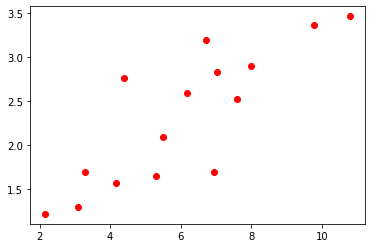

In [53]:
plt.plot(np.squeeze(x), np.squeeze(y), "ro")
plt.show()

In [55]:
# 通过pytorch搭建一个线性回归的模型

# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [57]:
model = linearRegression(input_dim=x.shape[1], output_dim=y.shape[1])
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [58]:
# 开始训练
x_train, y_train = torch.from_numpy(x), torch.from_numpy(y)

num_epochs = 1000
for epoch in range(num_epochs):
    # forward
    out = model(x_train)
    loss = criterion(out, y_train)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

Epoch[20/1000], loss: 0.718822
Epoch[40/1000], loss: 0.653607
Epoch[60/1000], loss: 0.607419
Epoch[80/1000], loss: 0.574677
Epoch[100/1000], loss: 0.551438
Epoch[120/1000], loss: 0.534916
Epoch[140/1000], loss: 0.523141
Epoch[160/1000], loss: 0.514721
Epoch[180/1000], loss: 0.508672
Epoch[200/1000], loss: 0.504300
Epoch[220/1000], loss: 0.501111
Epoch[240/1000], loss: 0.498760
Epoch[260/1000], loss: 0.497001
Epoch[280/1000], loss: 0.495660
Epoch[300/1000], loss: 0.494615
Epoch[320/1000], loss: 0.493779
Epoch[340/1000], loss: 0.493091
Epoch[360/1000], loss: 0.492508
Epoch[380/1000], loss: 0.491999
Epoch[400/1000], loss: 0.491542
Epoch[420/1000], loss: 0.491122
Epoch[440/1000], loss: 0.490729
Epoch[460/1000], loss: 0.490354
Epoch[480/1000], loss: 0.489993
Epoch[500/1000], loss: 0.489641
Epoch[520/1000], loss: 0.489297
Epoch[540/1000], loss: 0.488956
Epoch[560/1000], loss: 0.488620
Epoch[580/1000], loss: 0.488286
Epoch[600/1000], loss: 0.487954
Epoch[620/1000], loss: 0.487624
Epoch[640/10

In [59]:
model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

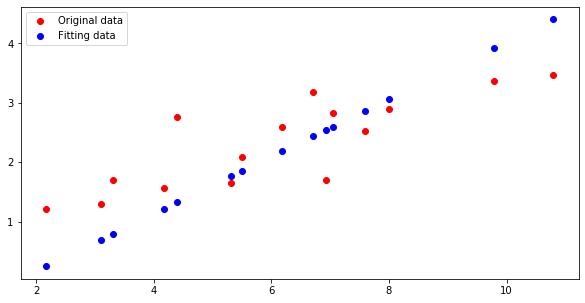

In [60]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, "bo", label='Fitting data')
# 显示图例
plt.legend() 
plt.show()

In [61]:
np.mean((predict - y)**2)

0.48144117